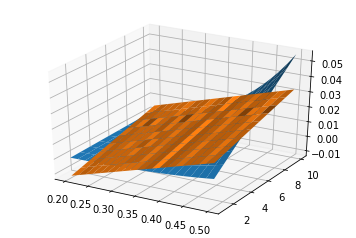

In [50]:
import numpy as np
factorial = np.math.factorial
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# the function to approximate
def h(rho, theta, k): 
    return (theta*(k*rho)**k / (2*factorial(int(np.floor(k)))*k**2*rho*(1-rho)**2
            *(sum([(k*rho)**n/factorial(n) for n in range(0,int(np.floor(k)))]) 
              + (k*rho)**k/(factorial(int(np.floor(k)))*(1-rho)))))


# definitions of the integration intervals
a = 0.2; b = 0.5; c = 1; d = 10; e=1; f=4

# helper function to set up the least square problem
def assemble(deg, k=None):
    
    def leggauss_scaled(s, t):
        x, w = np.polynomial.legendre.leggauss(deg=deg)
        return s + (x+1.)*(t-s)/2., (t-s)/2. * w

    X1, W1 = leggauss_scaled(a, b)
    X2, W2 = leggauss_scaled(c, d)
    if k is not None:
        X3 = [k]
        W3 = [1.]
    else:
        X3, W3 = leggauss_scaled(e, f)
    
    if k is not None:
        A = [[rho, theta, k]      for rho in X1 for theta in X2 for k in X3 ]
    else:
        A = [[rho, theta, k, 1.]  for rho in X1 for theta in X2 for k in X3 ]
    
    H = [[h(rho, theta, k)] for rho in X1 for theta in X2 for k in X3 ]
    W = [ w1*w2*w3          for w1 in W1 for w2 in W2 for w3 in W3 ]

    W = np.diag(np.sqrt(W))
    A = W*np.matrix(A)
    H = W*np.matrix(H)
    
    return A, H, [X1, X2, X3]

# solve the least square for different degrees to ensure convergence
coefs = []
quad_points = []
k = 6

for deg in range(3,15):
    A, H, X = assemble(deg, k=k)
    coefs.append(np.linalg.solve( A.T*A, A.T*H))
    quad_points.append(X)
    

# plot the approximation with highest quadrature degree
j = -1

ax  = plt.gca(projection='3d')
x,y = np.mgrid[ a:b:20j , c:d:10j ]

k_example = 1.

if k is not None:
    ax.plot_surface( x, y, h(x,y,k))
    ax.plot_surface( x, y, float(coefs[j][0])*x + float(coefs[j][1])*y 
                    + float(coefs[j][2])*k)
else:
    ax.plot_surface( x, y, h(x,y,k_example))
    ax.plot_surface( x, y, float(coefs[j][0])*x + float(coefs[j][1])*y 
                    + float(coefs[j][2])*k_example*np.ones_like(x) + float(coefs[j][3])*np.ones_like(x))

# Alternative implementation

In [26]:
# simple evaluation of the coefficients for fixed k and evaluation of the approximative
# function

import numpy as np
factorial = np.math.factorial
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# the function to approximate
def h(rho, theta, k): 
    return (theta*(k*rho)**k / (2*factorial(int(np.floor(k)))*k**2*rho*(1-rho)**2
            *(sum([(k*rho)**n/factorial(n) for n in range(0,int(np.floor(k)))]) 
              + (k*rho)**k/(factorial(int(np.floor(k)))*(1-rho)))))


# definitions of the integration intervals
a = 0.2; b = 0.5; c = 1; d = 10;

# helper function to set up the least square problem
def compute_coef(k, degree=10):
    
    def leggauss_scaled(s, t):
        x, w = np.polynomial.legendre.leggauss(deg=degree)
        return s + (x+1.)*(t-s)/2., (t-s)/2. * w

    X1, W1 = leggauss_scaled(a, b)
    X2, W2 = leggauss_scaled(c, d)
    
    A = [[rho, theta, k]      for rho in X1 for theta in X2]
    H = [[h(rho, theta, k)]   for rho in X1 for theta in X2]
    W = [ w1*w2             for w1 in W1 for w2 in W2]

    W = np.diag(np.sqrt(W))
    A = W*np.matrix(A)
    H = W*np.matrix(H)
    
    coef = np.linalg.solve( A.T*A, A.T*H)
    
    return coef

k_range = np.arange(1,7)
coefs = { k:compute_coef(k=k) for k in k_range}
    
def h_approx(rho, theta, k):
    assert k in k_range
    
    return coefs[k][0,0]*rho + coefs[k][1,0]*theta + coefs[k][2,0]*k 

In [27]:
coefs[0][0,0]

KeyError: 0

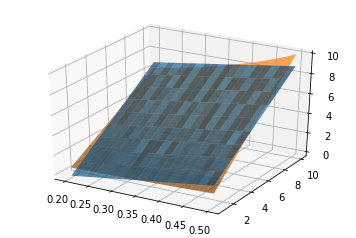

In [29]:
ax  = plt.gca(projection='3d')
x,y = np.mgrid[ a:b:20j , c:d:10j ]

for k in k_range:
    ax.plot_surface( x, y, h_approx(x,y,k), alpha=0.7)
    ax.plot_surface( x, y, h(x,y,k), alpha=0.7)
    plt.show()

In [25]:
{1:d for d in [1]}

{1: 1}